In [1]:
import pandas as pd 
import sklearn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [10]:
df = pd.read_csv('2_ecdc/agerangenotificationeu.csv')

In [11]:
df.head()

,country,country_code,year_week,age_group,new_cases,population,rate_14_day_per_100k,source
0,Austria,AT,2020-W09,<15yr,0,1278692,NaN,"TESSy COVID-19, national weekly data"
1,Austria,AT,2020-W10,<15yr,0,1278692,NaN,"TESSy COVID-19, national weekly data"
2,Austria,AT,2020-W11,<15yr,10,1278692,0.8,"TESSy COVID-19, national weekly data"
3,Austria,AT,2020-W12,<15yr,58,1278692,5.3,"TESSy COVID-19, national weekly data"
4,Austria,AT,2020-W13,<15yr,156,1278692,16.7,"TESSy COVID-19, national weekly data"


In [14]:
country_df = df.drop(["country_code", "source"], axis=1)
country_df.set_index("country")

country_df["rate_14_day_per_100k"] = country_df["rate_14_day_per_100k"].fillna(0)
country_df.head()

,country,year_week,age_group,new_cases,population,rate_14_day_per_100k
0,Austria,2020-W09,<15yr,0,1278692,0.0
1,Austria,2020-W10,<15yr,0,1278692,0.0
2,Austria,2020-W11,<15yr,10,1278692,0.8
3,Austria,2020-W12,<15yr,58,1278692,5.3
4,Austria,2020-W13,<15yr,156,1278692,16.7


In [47]:
## week 36 31/08/20 to week 48 29/11/20
country_df['week_number'] = df.year_week.str[-2:]
country_df["week_number"] = pd.to_numeric(country_df["week_number"])

mask = (country_df['week_number'] >= 36) & (country_df['week_number'] < 49)
europe_2_wave_df = country_df.loc[mask] 

country_df = europe_2_wave_df.drop(["year_week"], axis=1)

In [48]:
austria_df = country_df[country_df["country"]== "Austria"].copy()
austria_df = austria_df.drop(["country", "population"], axis=1)

austria_df = pd.melt(austria_df,
                    id_vars=["week_number", "age_group"],
                    var_name="Stat") 

/home/charlotte/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/charlotte/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/charlotte/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/charlotte/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/charlotte/anaconda3/lib/python3.6/site-packages/seaborn

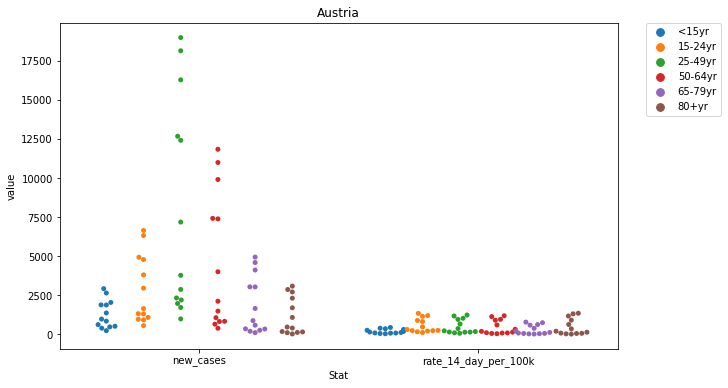

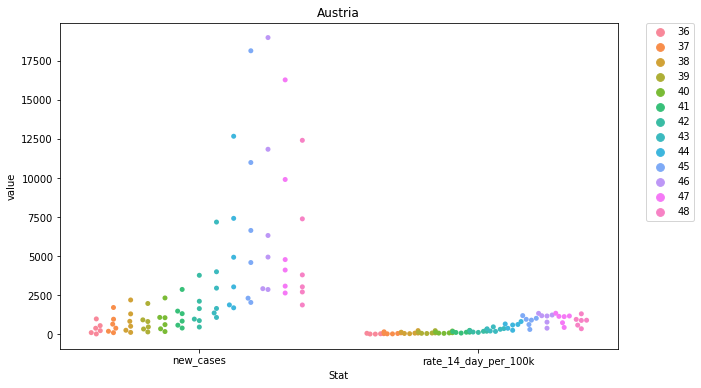

In [52]:
plt.figure(figsize=(10,6))
sns.swarmplot(x="Stat", y="value",
             data=austria_df,
             hue="age_group",
             dodge=True) # separate points by hue

plt.title("Austria")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(10,6))
sns.swarmplot(x="Stat", y="value",
             data=austria_df,
             hue="week_number",
             dodge=True) # separate points by hue

plt.title("Austria")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)